In [1]:
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

dataset = pd.read_csv("Social_Network_Ads.csv")
dataset

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


In [2]:
dataset = dataset.drop("User ID", axis = 1)
dataset = pd.get_dummies(dataset, drop_first = True, dtype = int)
dataset.columns

Index(['Age', 'EstimatedSalary', 'Purchased', 'Gender_Male'], dtype='object')

In [3]:
independent = dataset.drop(columns = ['Purchased'])
dependent = dataset[['Purchased']]
dependent.value_counts()

Purchased
0            257
1            143
Name: count, dtype: int64

In [4]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

scaler = StandardScaler()
x_scaled = scaler.fit_transform(independent)

x_train, x_test, y_train, y_test = train_test_split(x_scaled, dependent, test_size = 0.30, random_state = 0) 
x_train, x_test, y_train, y_test

(array([[-1.11320552, -1.60750566,  1.02020406],
        [ 2.13424088,  0.94723686,  1.02020406],
        [ 0.03295203,  1.24088543, -0.98019606],
        [ 0.22397829,  1.09406114,  1.02020406],
        [ 0.41500455, -0.49164111, -0.98019606],
        [-0.25358736, -0.31545197,  1.02020406],
        [ 0.98808332, -0.84401939,  1.02020406],
        [ 0.98808332,  1.88691227, -0.98019606],
        [ 0.03295203,  1.27025028, -0.98019606],
        [-0.82666613,  2.29802026,  1.02020406],
        [-1.11320552, -1.60750566, -0.98019606],
        [ 2.13424088, -0.81465453,  1.02020406],
        [-1.30423178, -1.49004624,  1.02020406],
        [ 0.41500455,  2.32738512,  1.02020406],
        [ 0.79705706,  0.77104772, -0.98019606],
        [-0.92217926, -0.31545197,  1.02020406],
        [ 0.12846516,  0.77104772,  1.02020406],
        [-0.92217926,  0.56549373,  1.02020406],
        [ 0.31949142,  0.06629116,  1.02020406],
        [ 0.70154394, -1.28449224,  1.02020406],
        [-0.44461362

In [5]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_neighbors' : [5,7,9,11,13,15],
    'weights' : ['uniform','distance'],
    'metric' : ['minkowski','euclidean','manhattan']
}

grid = GridSearchCV(
    KNeighborsClassifier(), 
    param_grid, 
    refit = True, 
    cv=3,              
    scoring='f1_weighted',  
    n_jobs=-1            
)

grid.fit(x_train, y_train)
print(grid.best_params_)

{'metric': 'minkowski', 'n_neighbors': 9, 'weights': 'uniform'}


In [6]:
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score

best_model = grid.best_estimator_
y_pred = best_model.predict(x_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

cm = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:\n", cm)

y_prob = best_model.predict_proba(x_test)[:, 1]
roc_auc = float(roc_auc_score(y_test, y_prob))
print(f"\nROC-AUC Score: {roc_auc:.2f}")

Accuracy: 0.93

Confusion Matrix:
 [[74  5]
 [ 4 37]]

ROC-AUC Score: 0.96


In [7]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve

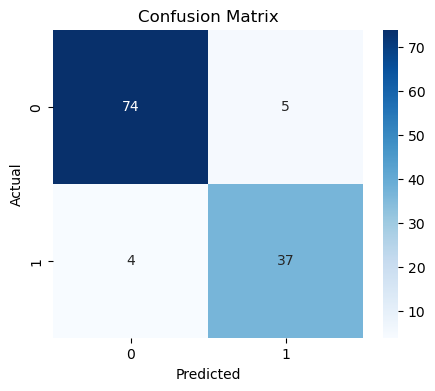

In [8]:
# ---------------------------------------------------------
# Confusion Matrix Heatmap
# ---------------------------------------------------------
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

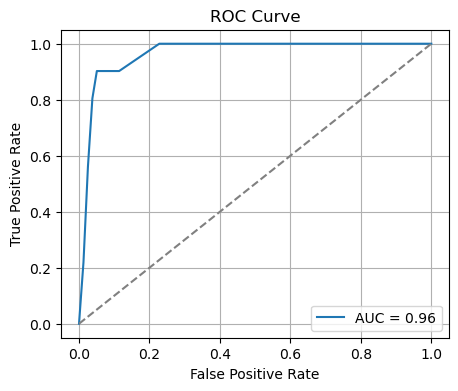

In [9]:
# ---------------------------------------------------------
# ROC Curve
# ---------------------------------------------------------
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

plt.figure(figsize=(5,4))
plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.2f}")
plt.plot([0,1], [0,1], linestyle='--', color='gray')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.grid(True)
plt.show()

In [10]:
input = [[32, 85000, 0]]   # Age, Salary, gender
prediction = best_model.predict(input)
print("Sample Input:", input)
print("Predicted Output:", prediction[0])

Sample Input: [[32, 85000, 0]]
Predicted Output: 1
